# Linear Regression performed on a student performance factors dataset

## Importing necessary libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('../data/StudentPerformanceFactors.csv')

## Overview of the dataset

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


### Shape of the dataframe

In [5]:
df.shape

(6607, 20)

### Info on the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Number of null values for each column

In [7]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

### Number of duplicate rows

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
School_Type
Public     4598
Private    2009
Name: count, dtype: int64
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
Distance_from_Home
Near        3884
Moderate    1998
Far          

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [11]:
df.describe(include='O').T

,count,unique,top,freq
Parental_Involvement,6607,3,Medium,3362
Access_to_Resources,6607,3,Medium,3319
Extracurricular_Activities,6607,2,Yes,3938
Motivation_Level,6607,3,Medium,3351
Internet_Access,6607,2,Yes,6108
Family_Income,6607,3,Low,2672
Teacher_Quality,6529,3,Medium,3925
School_Type,6607,2,Public,4598
Peer_Influence,6607,3,Positive,2638
Learning_Disabilities,6607,2,No,5912


### Histograms (for numerical variables)

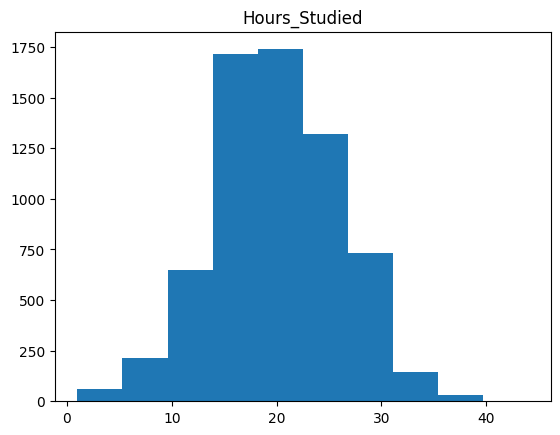

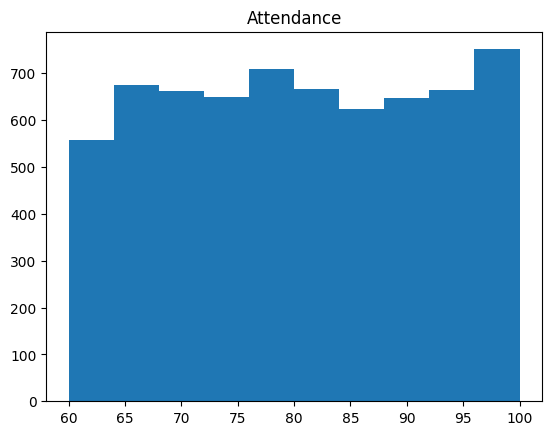

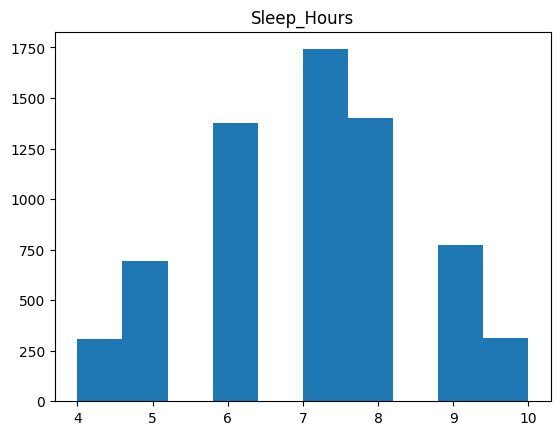

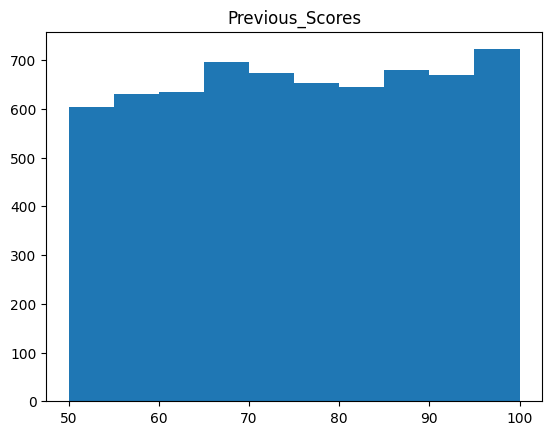

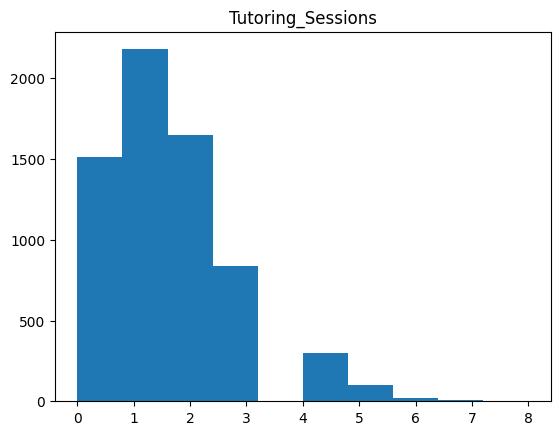

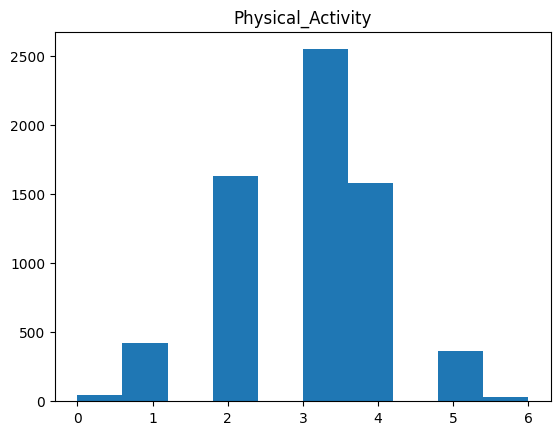

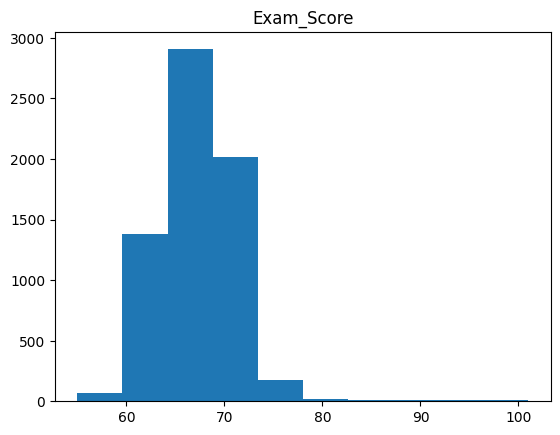

In [12]:
for column in df.select_dtypes(include='number').columns:
    plt.hist(data=df, x=column)
    plt.title(column)
    plt.show()

### Box plot (to identify outliers)

A box plot shows the **median/second** quartile (the line in the middle of the box), the **first** and **third quartiles** (the edges of the box), and **outliers** (the dots lying outside 1.5 times the interquartile range)

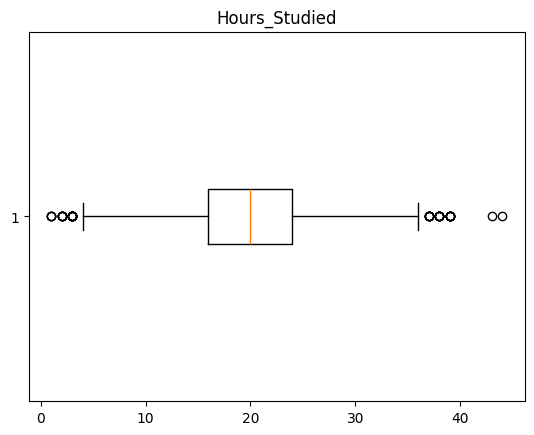

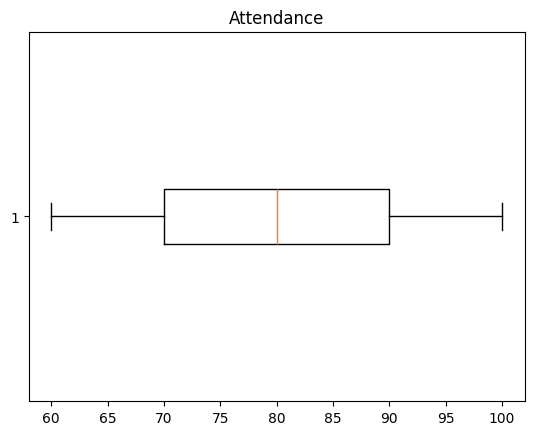

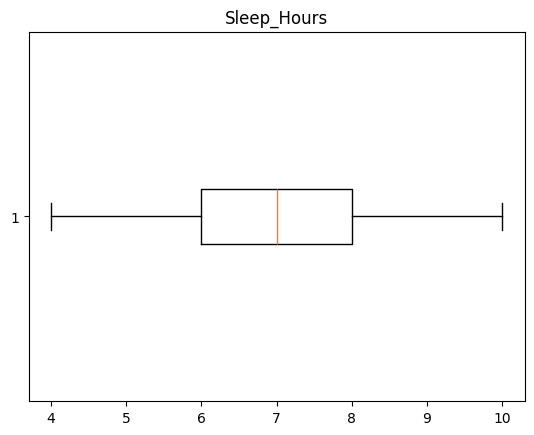

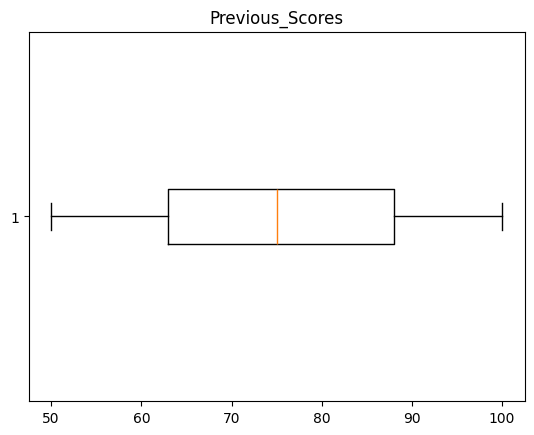

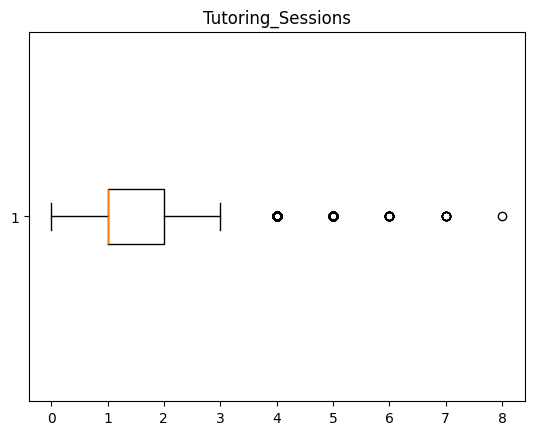

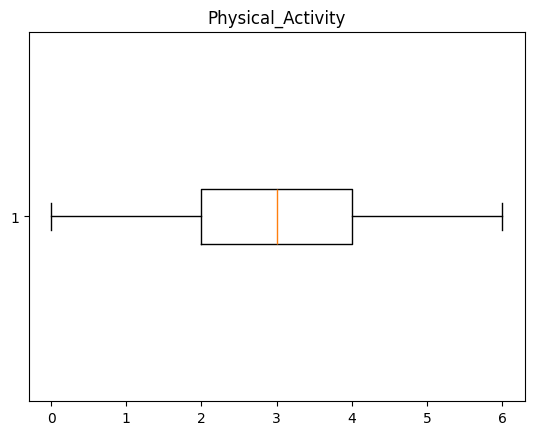

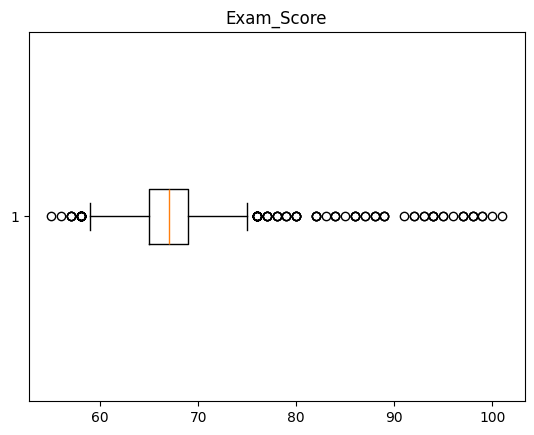

In [13]:
for column in df.select_dtypes(include='number').columns:
    plt.boxplot(data=df, x=column, vert=False)
    plt.title(column)
    plt.show()

### Scatter plot to show relationship between hours spent studying and other variables

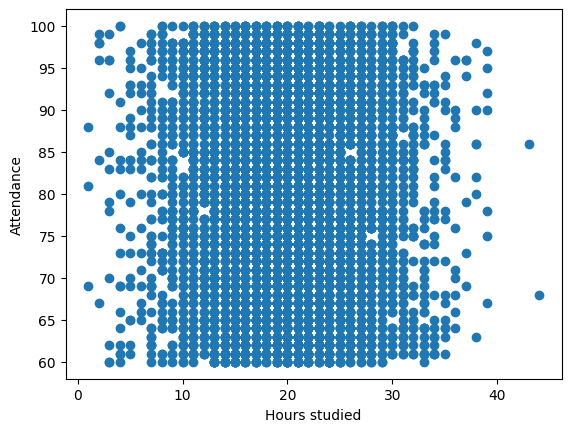

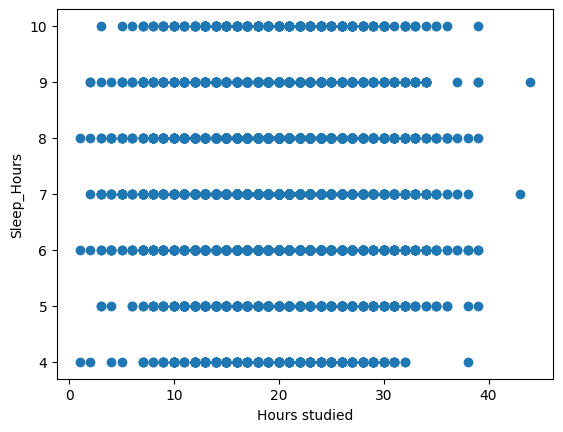

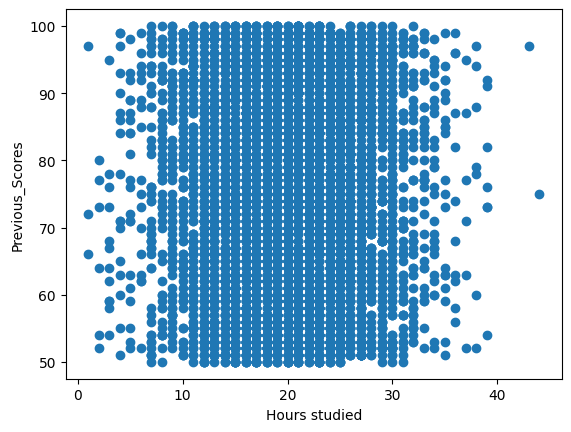

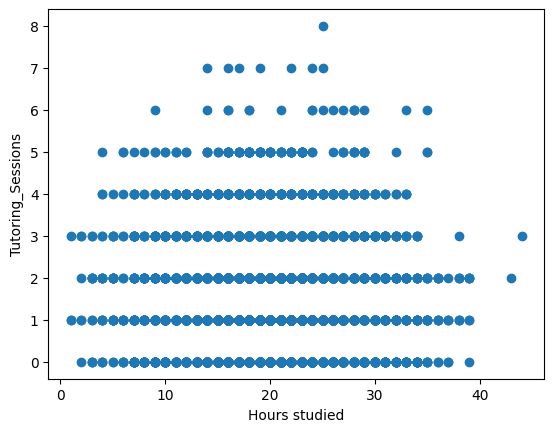

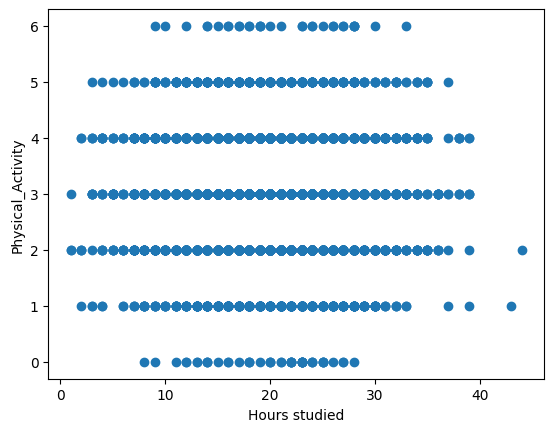

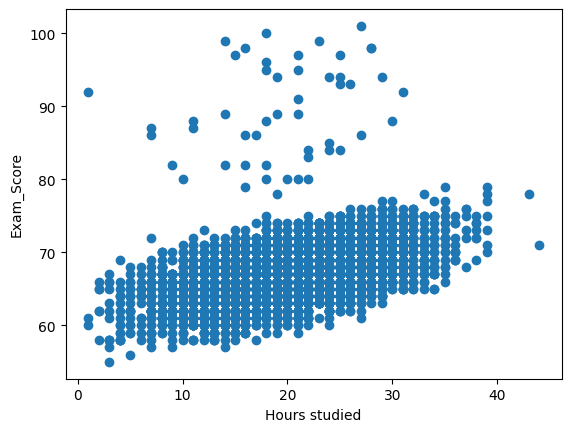

In [14]:
for column in df.select_dtypes(include='number').columns.drop('Hours_Studied'):
    plt.scatter(df['Hours_Studied'], df[column])
    plt.xlabel('Hours studied')
    plt.ylabel(column)
    plt.show()

### Correlation between pairs of numerical variables

In [15]:
corr = df.select_dtypes(include='number').corr()
corr

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


### Heatmap to visualize the correlations

<Axes: >

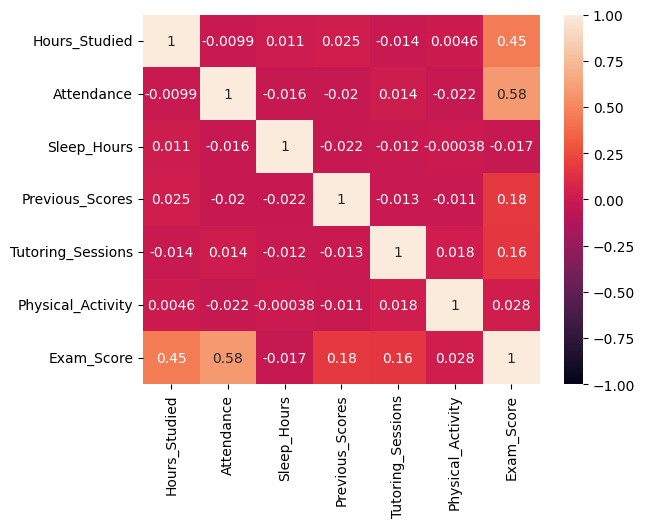

In [16]:
sns.heatmap(corr, annot=True, vmin=-1)

## Data cleaning

### Columns for which there are more than one missing value

In [17]:
missing = df.columns[df.isnull().sum() > 0]
missing

Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')

### Dropping rows containing one or more missing values

In [18]:
df.dropna(inplace=True)
print(df.columns[df.isnull().sum() > 0])

Index([], dtype='object')


Alternatively, we can fill the missing values with a placeholder value of our choice, i.e. the **mode** (most common value for the column):
```python
for column in missing:
    df.fillna({column: df[column].mode()[0]}, inplace=True)
```

### The following method allows to define the **whiskers** (values within 1.5 times the interquartile value's range from the first and third quartiles)

In [19]:
def whiskers(column):
    first_quartile = df[column].quantile(0.25)
    third_quartile = df[column].quantile(0.75)
    interquartile = third_quartile - first_quartile
    lower_whisker = first_quartile - 1.5 * interquartile
    upper_whisker = third_quartile + 1.5 * interquartile
    return lower_whisker, upper_whisker

### **Outlier treatment**: We can replace values that lie outside the whiskers by either the upper or lower whisker

In [20]:
for column in df.select_dtypes(include='number').columns:
    lower, upper = whiskers(column)
    df[column] = np.where(df[column] < lower, lower, df[column]) # if the value of the column is less than the lw, replace it with the lw, otherwise leave it
    df[column] = np.where(df[column] > upper, upper, df[column])

### Now we check if we have any outliers left

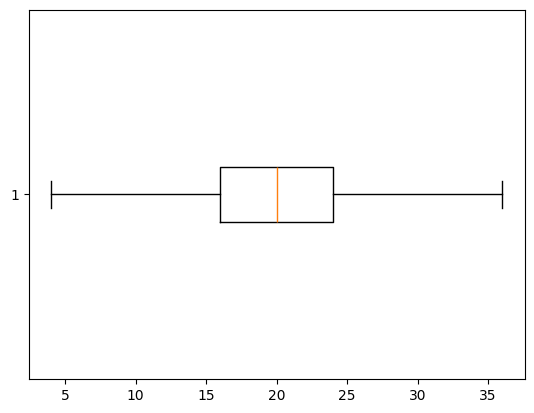

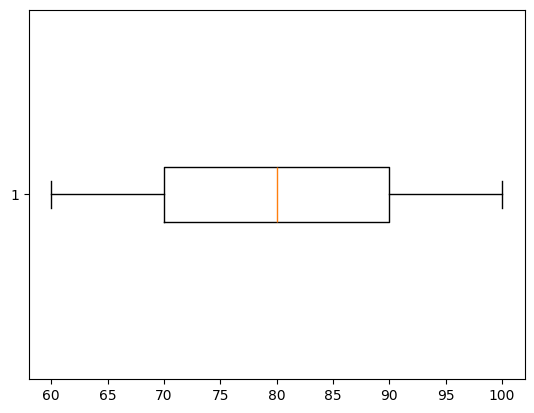

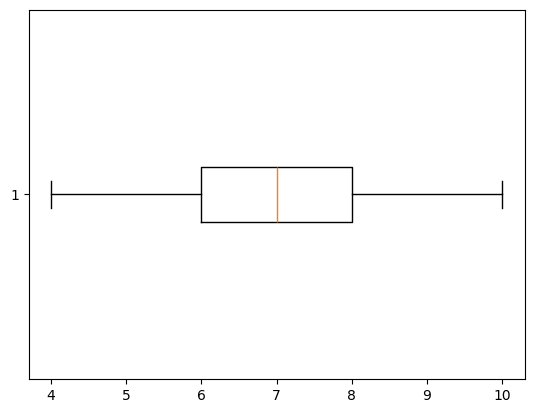

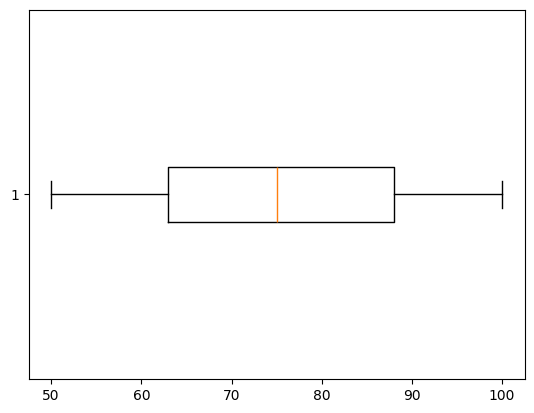

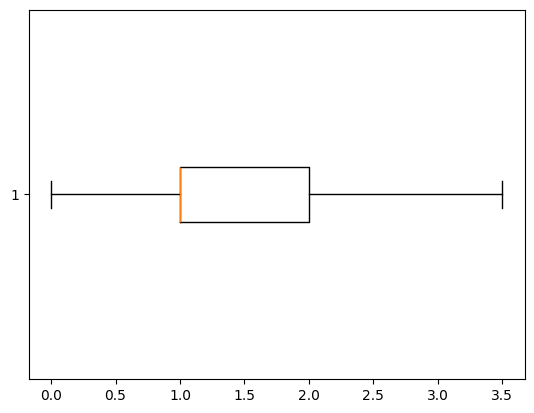

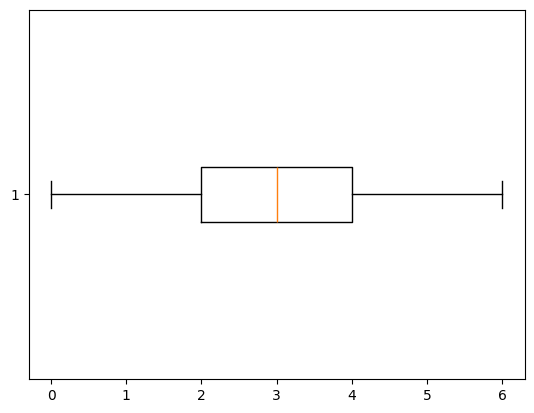

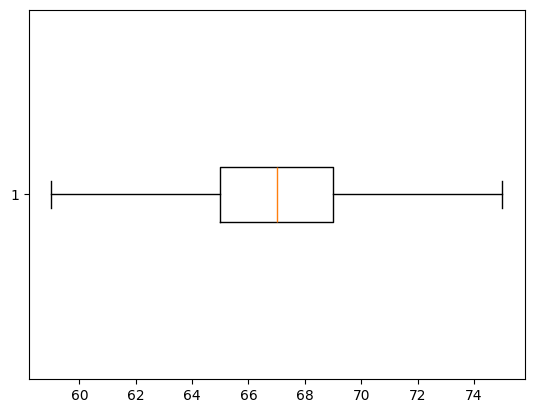

In [21]:
for column in df.select_dtypes(include='number').columns:
    plt.boxplot(df[column], vert=False)
    plt.show()

## Encoding

### Ordinal and nominal variables

In [22]:
ordered = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']
nominal = [col for col in df.select_dtypes(include='object').columns if col not in ordered]
print(ordered)
print(nominal)

['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']
['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender']


### Encoding ordinal features

In [23]:
categories = [
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Negative', 'Neutral', 'Positive'],
    ['High School', 'College', 'Postgraduate'],
    ['Near', 'Moderate', 'Far']
]

In [24]:
ord_enc = OrdinalEncoder(categories=categories)

In [25]:
df[ordered] = ord_enc.fit_transform(df[ordered])

### Encoding nominal features

In [26]:
nom_enc = OneHotEncoder(sparse_output=False)

In [27]:
features = nom_enc.fit_transform(df[nominal])

In [28]:
label_names = nom_enc.get_feature_names_out(df[nominal].columns)

In [29]:
features = pd.DataFrame(features, columns=label_names)

In [30]:
df.reset_index(drop=True, inplace=True)
features.reset_index(drop=True, inplace=True)
new_df = pd.concat([df.drop(columns=nominal), features], axis=1)

## Regression

In [31]:
target = new_df['Exam_Score']
features = new_df.drop(columns=['Exam_Score'])

### Splitting data into training and testing data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

## Instanciating a Linear Regression model and training it on the training data

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train, y_train)

LinearRegression()

### Predicting the results for the testing data

In [35]:
y_pred = model.predict(x_test)

### Properties of the model

In [36]:
print(f'Coefficients of the linear regression line: {model.coef_}')
print(f'The y-intercept: {model.intercept_}')

Coefficients of the linear regression line: [ 0.2904692   0.19549951  0.98398052  0.99166853  0.00972764  0.04764031
  0.52629352  0.5377541   0.4881498   0.51830403  0.49798533  0.20709484
  0.49843303 -0.46787575 -0.25271562  0.25271562 -0.47998925  0.47998925
 -0.00582596  0.00582596  0.42363166 -0.42363166 -0.0054564   0.0054564 ]
The y-intercept: 35.52402991933552


## Evaluating the model

In [37]:
print(f"The R squared score of the model: {r2_score(y_test, y_pred)}")
print(f"Mean absolute error of the model: {mean_absolute_error(y_test, y_pred)}")

The R squared score of the model: 0.955125713073455
Mean absolute error of the model: 0.3362080331658785
